# MALIGNANT COMMENTS CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading Dataset
train = pd.read_csv('C:\\Users\\DELL\\Desktop\\Internship\\Malignant Comments Classifier Project\\train.csv')
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
test = pd.read_csv('C:\\Users\\DELL\\Desktop\\Internship\\Malignant Comments Classifier Project\\test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [5]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [6]:
#Checking for duplicated values in our datasets

print("Duplicated values in train csv: \n \n",train.duplicated().sum())
print("\n \n Duplicated values in train csv : \n \n ",test.duplicated().sum())

Duplicated values in train csv: 
 
 0

 
 Duplicated values in train csv : 
 
  0


In [7]:
#Analysing Datatypes in our dataset 

train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Correlation Matrix

train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


Text(0.5, 1.0, 'Correlation matrix of Labels')

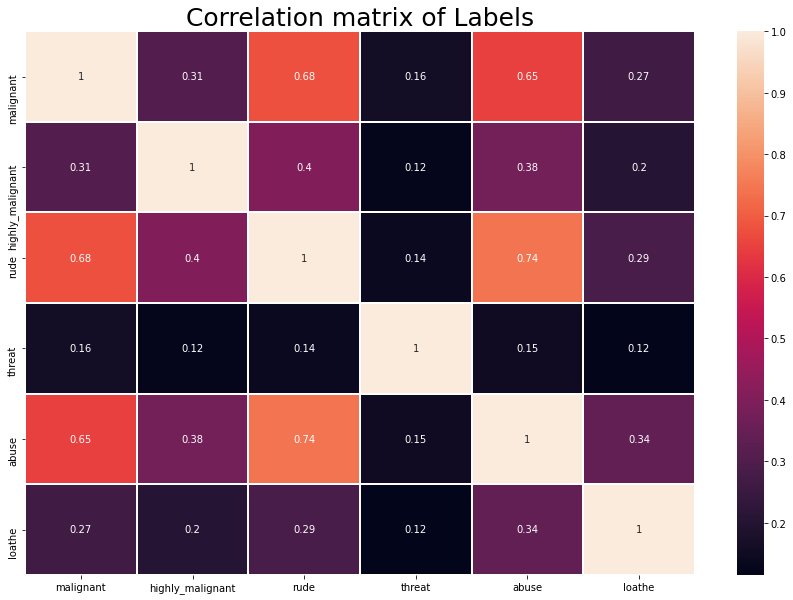

In [9]:
plt.figure(figsize = (15,10))
sns.heatmap(train.corr(),annot = True, linewidth = '.2')
plt.title("Correlation matrix of Labels", fontsize = 25)

## Univariate Analysis

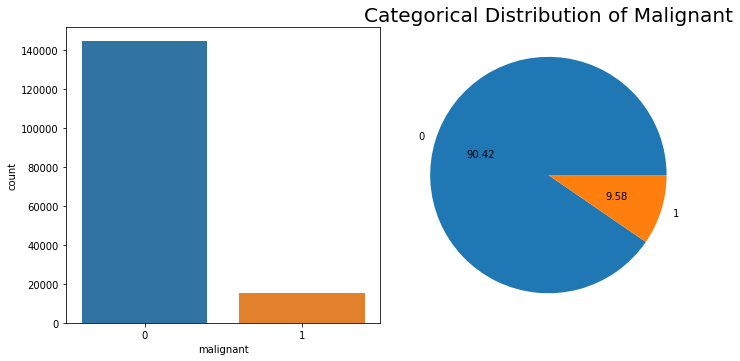

In [10]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(train['malignant'], ax = ax[0])
train.groupby('malignant').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Malignant", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

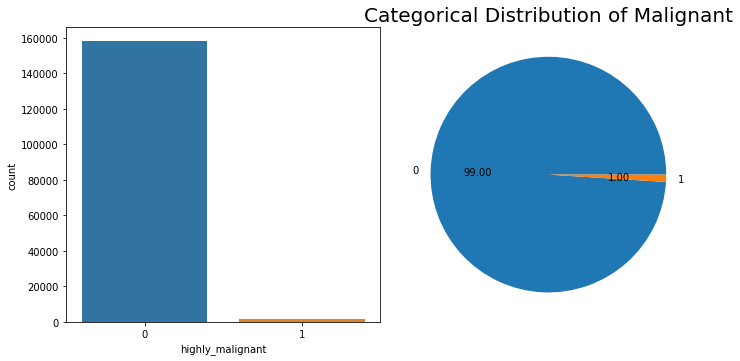

In [11]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(train['highly_malignant'], ax = ax[0])
train.groupby('highly_malignant').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Malignant", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

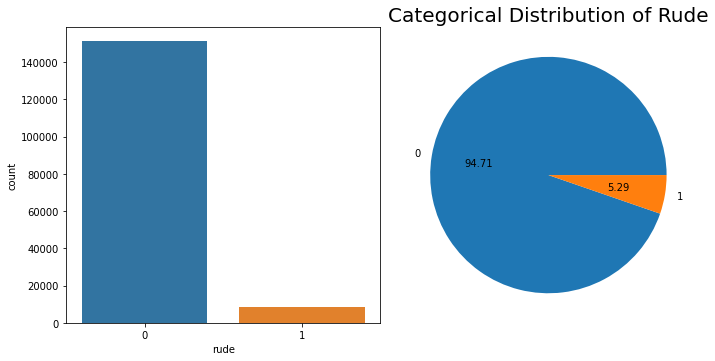

In [12]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(train['rude'], ax = ax[0])
train.groupby('rude').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Rude", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

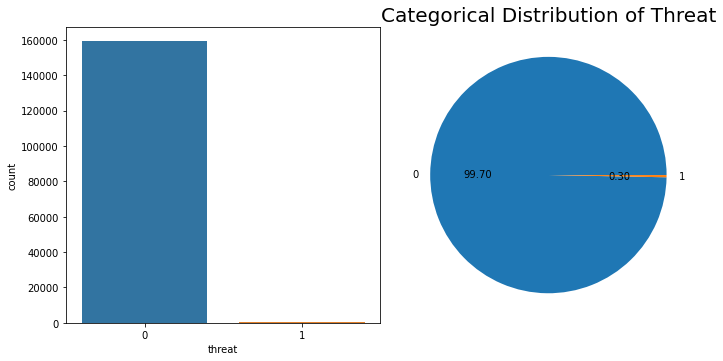

In [13]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(train['threat'], ax = ax[0])
train.groupby('threat').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Threat", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

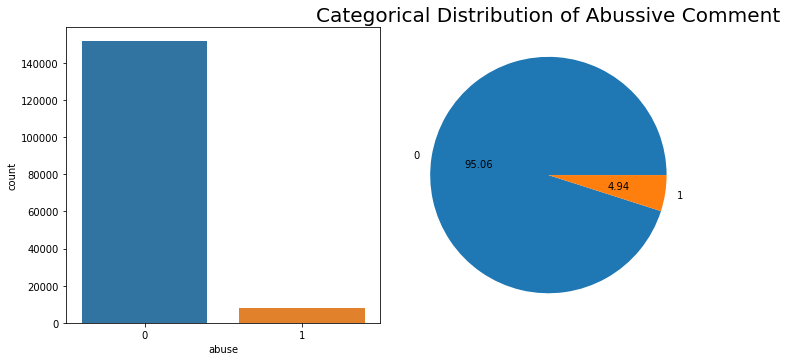

In [14]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(train['abuse'], ax = ax[0])
train.groupby('abuse').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Abussive Comment", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

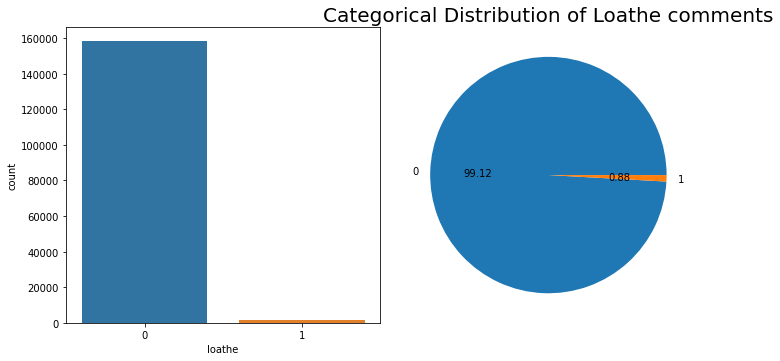

In [15]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(train['loathe'], ax = ax[0])
train.groupby('loathe').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Loathe comments", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

In [16]:
data_count = train.iloc[:,2:].sum()
data_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

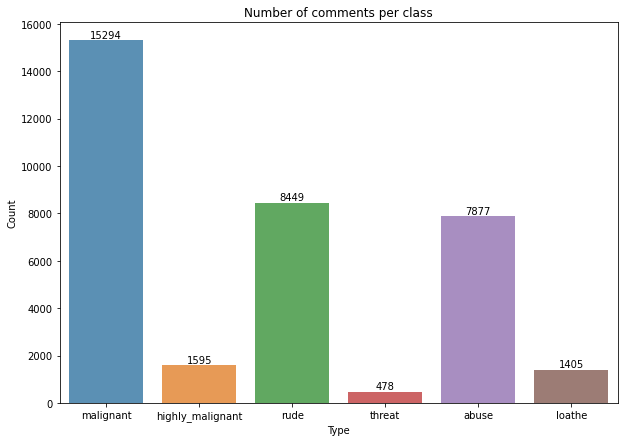

In [17]:
#Multivariate Analysis of all our Multi Labels

plt.figure(figsize=(10,7))
ax = sns.barplot(data_count.index, data_count.values, alpha=0.8)

plt.title("Number of comments per class")
plt.ylabel("Count")
plt.xlabel("Type")

rects = ax.patches
labels = data_count.values
for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height +5,label, ha = 'center', va = 'bottom')

## Data Visualization using WordCloud

In [18]:
from wordcloud import WordCloud

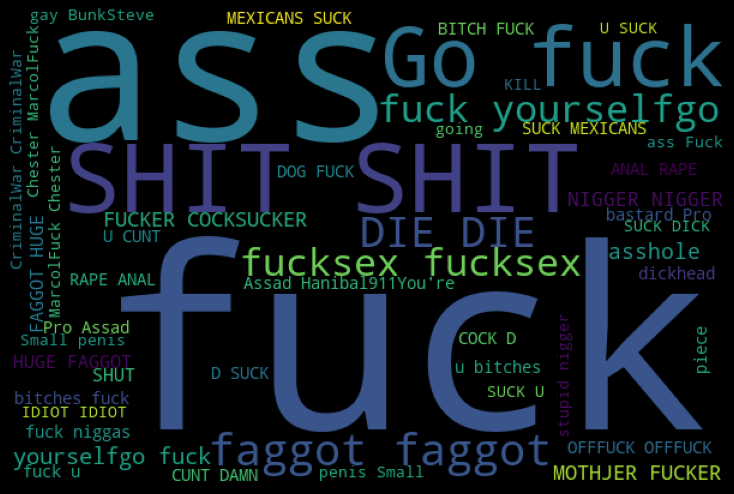

In [19]:
# Viusalising words which are categorised as Highly-Malignant words 

hams = train['comment_text'][train['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

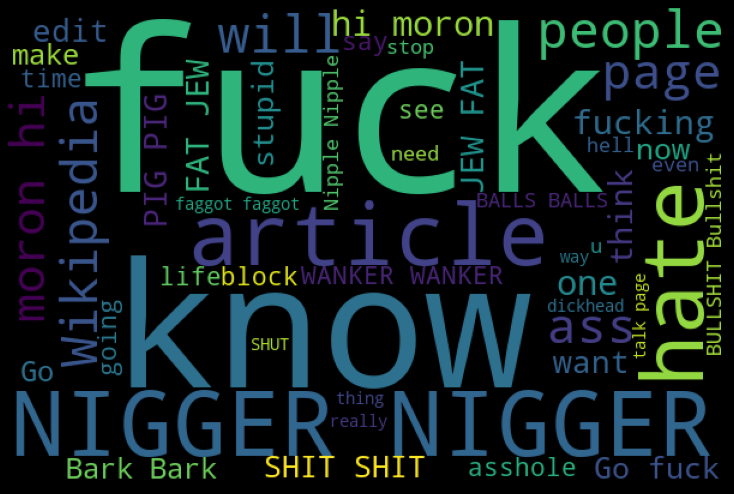

In [20]:
# Viusalising words which are categorised as Highly-Malignant words 

hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

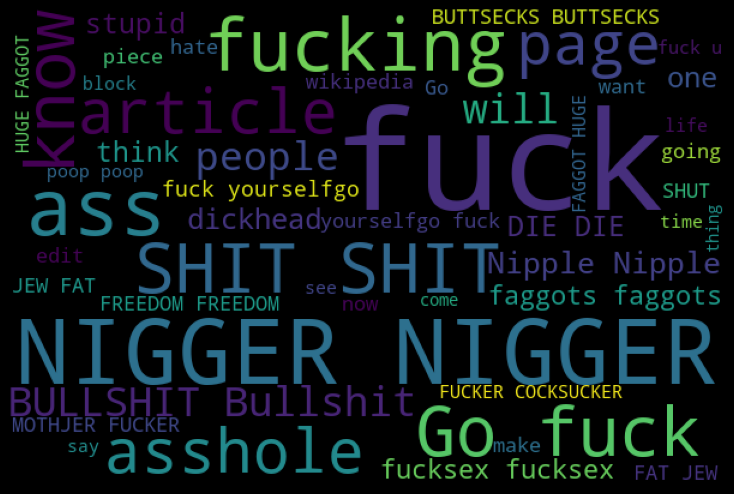

In [21]:
# Viusalising words which are categorised as Rude words 

hams = train['comment_text'][train['rude']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

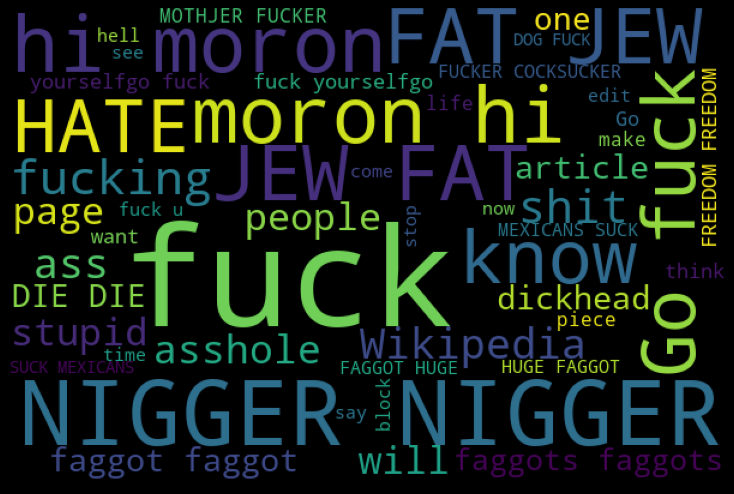

In [22]:
# Viusalising words which are categorised as Abusive words

hams = train['comment_text'][train['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

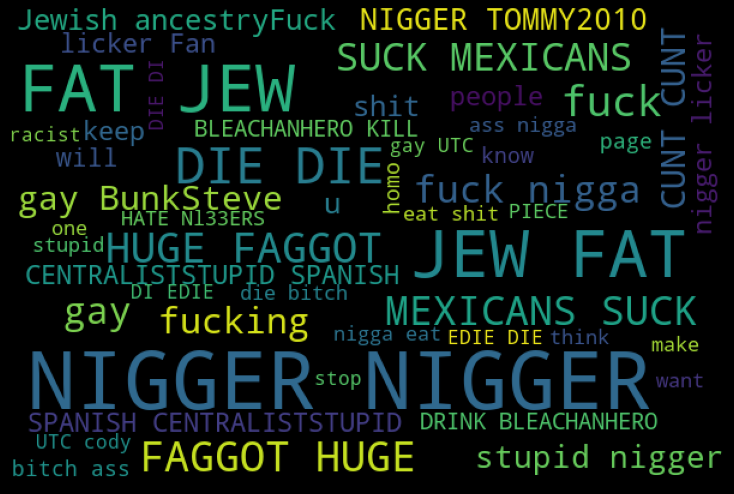

In [23]:
# Viusalising words which are categorised as Laothe words 

hams = train['comment_text'][train['loathe']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

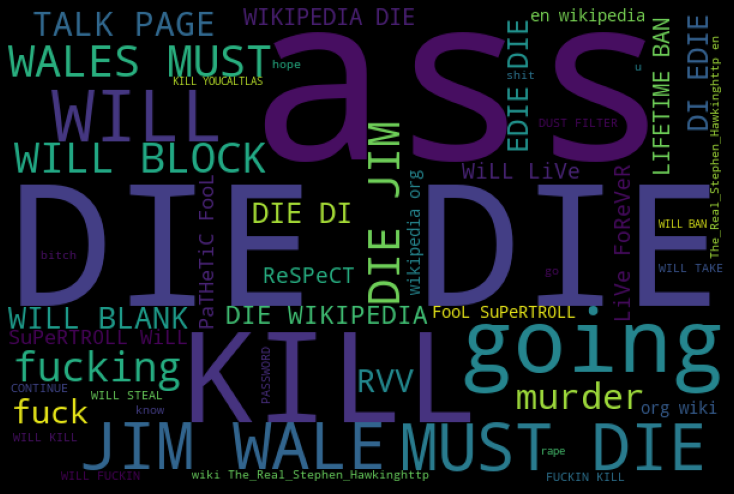

In [24]:
# Viusalising words which are categorised as Threatening words 

hams = train['comment_text'][train['threat']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

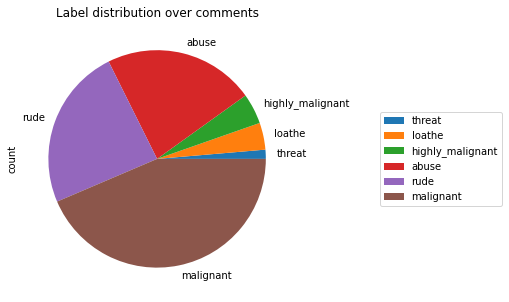

In [25]:
# Multivariate Analysis of all the multi labels.

target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

### Text Normalization

In [26]:
# Converting all words into lower case

train["comment_text"] = train["comment_text"].str.lower()

In [27]:
# Remove Special Characters,numbers and punctuations.

train['comment_text1']=train['comment_text'].str.replace("[^a-zA-Z#]"," ")

In [28]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_text1
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,d aww he matches this background colour i m s...
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,hey man i m really not trying to edit war it...
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,more i can t make any real suggestions on im...
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember...


In [29]:
train.drop(['comment_text'],inplace=True,axis=1)

In [30]:
# Individual words considered as Tokens

tokenized_review=train['comment_text1'].apply(lambda x: x.split())
tokenized_review.head()

0    [explanation, why, the, edits, made, under, my...
1    [d, aww, he, matches, this, background, colour...
2    [hey, man, i, m, really, not, trying, to, edit...
3    [more, i, can, t, make, any, real, suggestions...
4    [you, sir, are, my, hero, any, chance, you, re...
Name: comment_text1, dtype: object

In [31]:
# Making a Stop Words list
import nltk
nltk.download('stopwords')

stopwords= nltk.corpus.stopwords.words('english')
stopwords[0:15]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

In [32]:
# Removal of Stop Words

def rem_stop(tokenized_txt):
    txt_clean=[word for word in tokenized_txt if word not in stopwords]
    return txt_clean

In [33]:
tokenized_review=tokenized_review.apply(lambda x: rem_stop(x))
tokenized_review.head()

0    [explanation, edits, made, username, hardcore,...
1    [aww, matches, background, colour, seemingly, ...
2    [hey, man, really, trying, edit, war, guy, con...
3    [make, real, suggestions, improvement, wondere...
4                  [sir, hero, chance, remember, page]
Name: comment_text1, dtype: object

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
#Performing Lemmatization of words
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
tokenized_review = tokenized_review.apply(lambda x: word_lemmatizer(x))

tokenized_review.head()

0    [explanation, edits, made, username, hardcore,...
1    [aww, match, background, colour, seemingly, st...
2    [hey, man, really, trying, edit, war, guy, con...
3    [make, real, suggestion, improvement, wondered...
4                  [sir, hero, chance, remember, page]
Name: comment_text1, dtype: object

In [36]:
# Combine words into single sentence

for i in range(len(tokenized_review)):
    tokenized_review[i]=" ".join(tokenized_review[i])
train['clean_comment']=tokenized_review
train.head()

,id,malignant,highly_malignant,rude,threat,abuse,loathe,comment_text1,clean_comment
0,0000997932d777bf,0,0,0,0,0,0,explanation why the edits made under my userna...,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,0,0,0,0,0,0,d aww he matches this background colour i m s...,aww match background colour seemingly stuck th...
2,000113f07ec002fd,0,0,0,0,0,0,hey man i m really not trying to edit war it...,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,0,0,0,0,0,0,more i can t make any real suggestions on im...,make real suggestion improvement wondered sect...
4,0001d958c54c6e35,0,0,0,0,0,0,you sir are my hero any chance you remember...,sir hero chance remember page


In [37]:
train.drop(['comment_text1'],inplace=True,axis=1)

In [38]:
# Creating a new variable containing all labels. Subgrouping them to one toxic or non - toxic 
target_data = train[target]
target_data

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [39]:
train.head()

,id,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment
0,0000997932d777bf,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,0,0,0,0,0,0,aww match background colour seemingly stuck th...
2,000113f07ec002fd,0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,0,0,0,0,0,0,make real suggestion improvement wondered sect...
4,0001d958c54c6e35,0,0,0,0,0,0,sir hero chance remember page


In [40]:
# Creating a new variable containing all labels. Subgrouping them to one toxic or non - toxic 
target_data = train[target]
target_data

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [41]:
train['Target'] =train[target].sum(axis =1)
train.head()

,id,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment,Target
0,0000997932d777bf,0,0,0,0,0,0,explanation edits made username hardcore metal...,0
1,000103f0d9cfb60f,0,0,0,0,0,0,aww match background colour seemingly stuck th...,0
2,000113f07ec002fd,0,0,0,0,0,0,hey man really trying edit war guy constantly ...,0
3,0001b41b1c6bb37e,0,0,0,0,0,0,make real suggestion improvement wondered sect...,0
4,0001d958c54c6e35,0,0,0,0,0,0,sir hero chance remember page,0


In [42]:
train['Target'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: Target, dtype: int64

In [43]:
#  Convert text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 20000, stop_words='english')
features = tf_vec.fit_transform(train['clean_comment'])

### Testing Csv

In [44]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [45]:
# Converting all words into lower case

test["comment_text"] = test["comment_text"].str.lower()

In [46]:
# Remove Special Characters,numbers and punctuations.

test['comment_text1']=test['comment_text'].str.replace("[^a-zA-Z#]"," ")

In [47]:
test.head()

,id,comment_text,comment_text1
0,00001cee341fdb12,yo bitch ja rule is more succesful then you'll...,yo bitch ja rule is more succesful then you ll...
1,0000247867823ef7,== from rfc == \n\n the title is fine as it is...,from rfc the title is fine as it is ...
2,00013b17ad220c46,""" \n\n == sources == \n\n * zawe ashton on lap...",sources zawe ashton on lapland...
3,00017563c3f7919a,":if you have a look back at the source, the in...",if you have a look back at the source the in...
4,00017695ad8997eb,i don't anonymously edit articles at all.,i don t anonymously edit articles at all


In [48]:
test.drop(['comment_text'],inplace=True,axis=1)

In [49]:
# Individual words considered as Tokens

tokenized_review=test['comment_text1'].apply(lambda x: x.split())
tokenized_review.head()

0    [yo, bitch, ja, rule, is, more, succesful, the...
1    [from, rfc, the, title, is, fine, as, it, is, ...
2                 [sources, zawe, ashton, on, lapland]
3    [if, you, have, a, look, back, at, the, source...
4    [i, don, t, anonymously, edit, articles, at, all]
Name: comment_text1, dtype: object

In [50]:
# Making a Stop Words list
import nltk
nltk.download('stopwords')

stopwords= nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# Removal of Stop Words

def rem_stop(tokenized_txt):
    txt_clean=[word for word in tokenized_txt if word not in stopwords]
    return txt_clean

In [52]:
tokenized_review=tokenized_review.apply(lambda x: rem_stop(x))
tokenized_review.head()

0    [yo, bitch, ja, rule, succesful, ever, whats, ...
1                              [rfc, title, fine, imo]
2                     [sources, zawe, ashton, lapland]
3    [look, back, source, information, updated, cor...
4                        [anonymously, edit, articles]
Name: comment_text1, dtype: object

In [53]:
#Performing Lemmatization of words
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
tokenized_review = tokenized_review.apply(lambda x: word_lemmatizer(x))

tokenized_review.head()

0    [yo, bitch, ja, rule, succesful, ever, whats, ...
1                              [rfc, title, fine, imo]
2                      [source, zawe, ashton, lapland]
3    [look, back, source, information, updated, cor...
4                         [anonymously, edit, article]
Name: comment_text1, dtype: object

In [54]:
# Combine words into single sentence

for i in range(len(tokenized_review)):
    tokenized_review[i]=" ".join(tokenized_review[i])
test['clean_comment']=tokenized_review
test.head()

,id,comment_text1,clean_comment
0,00001cee341fdb12,yo bitch ja rule is more succesful then you ll...,yo bitch ja rule succesful ever whats hating s...
1,0000247867823ef7,from rfc the title is fine as it is ...,rfc title fine imo
2,00013b17ad220c46,sources zawe ashton on lapland...,source zawe ashton lapland
3,00017563c3f7919a,if you have a look back at the source the in...,look back source information updated correct f...
4,00017695ad8997eb,i don t anonymously edit articles at all,anonymously edit article


In [55]:
test.drop(['comment_text1'],inplace=True,axis=1)

## Splitting Dataset

In [56]:
#Dividing into target and features
X = features
y = train['Target']

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=56,test_size=.30)

In [58]:
X_train.shape, X_test.shape

((111699, 20000), (47872, 20000))

In [59]:
y_train.shape, y_test.shape

((111699,), (47872,))

In [60]:
#Importing Classification Models 
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Importing Classification Model Evaluation Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss, hamming_loss, average_precision_score

#Importing Hyperparameter Tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


## Logistic Regression

In [61]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=3000)

In [62]:
# Performing Evaluation metrics for our model
predlg = LG.predict(X_test)

print('Accuracy Score for Logistic Regression is :',round(accuracy_score(y_test,predlg),4)*100,'% \n')
print('Confusion Matrix of Logistic Regression : \n',confusion_matrix(y_test,predlg), '\n')
print('Classification Logistic Regression : \n',classification_report(y_test,predlg))
print("Hamming Loss for our Logistic Regression model is : ",hamming_loss(y_test,predlg))

Accuracy Score for Logistic Regression is : 91.83 % 

Confusion Matrix of Logistic Regression : 
 [[42831   100     8    11     0     0     0]
 [ 1477   298    66    97     9     0     0]
 [  504   201   101   235    10     0     0]
 [  286   173   118   632    65     1     0]
 [   68    50    30   277    99     3     0]
 [   15    10     6    44    35     2     0]
 [    1     0     1     2     5     1     0]] 

Classification Logistic Regression : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     42950
           1       0.36      0.15      0.21      1947
           2       0.31      0.10      0.15      1051
           3       0.49      0.50      0.49      1275
           4       0.44      0.19      0.26       527
           5       0.29      0.02      0.03       112
           6       0.00      0.00      0.00        10

    accuracy                           0.92     47872
   macro avg       0.40      0.28      0.30     47872
wei

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

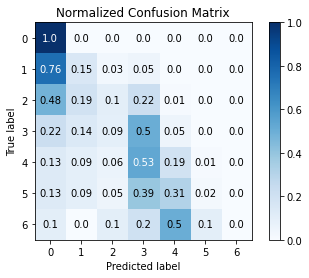

In [63]:
#Plotting Confusion Matrix of Logistic Regression model
import scikitplot as skplt
import missingno as msno
import eli5

skplt.metrics.plot_confusion_matrix(y_test, predlg, normalize=True)

## Random Forest Classifier

In [64]:
RF = RandomForestClassifier(max_depth=7)

In [65]:
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=7)

In [66]:
# Performing Evaluation metrics for our model
predrf=RF.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predrf),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predrf), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predrf))
print("Hamming Loss for our Random Forest Classifier model is : ",hamming_loss(y_test,predrf))

Accuracy Score for Random Forest Classifier is : 89.72 % 

Confusion Matrix of Random Forest Classifier : 
 [[42950     0     0     0     0     0     0]
 [ 1947     0     0     0     0     0     0]
 [ 1051     0     0     0     0     0     0]
 [ 1275     0     0     0     0     0     0]
 [  527     0     0     0     0     0     0]
 [  112     0     0     0     0     0     0]
 [   10     0     0     0     0     0     0]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     42950
           1       0.00      0.00      0.00      1947
           2       0.00      0.00      0.00      1051
           3       0.00      0.00      0.00      1275
           4       0.00      0.00      0.00       527
           5       0.00      0.00      0.00       112
           6       0.00      0.00      0.00        10

    accuracy                           0.90     47872
   macro avg       0.13      0.14      0.1

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

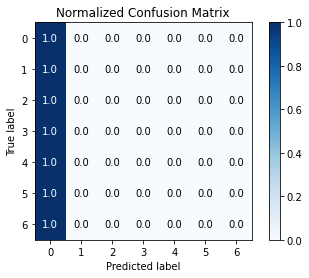

In [67]:
#Plotting Confusion Matrix of Logistic Regression model
skplt.metrics.plot_confusion_matrix(y_test, predrf, normalize=True)

## Multinomial Naive Bayes

In [68]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [69]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)

MultinomialNB()

In [70]:
# Performing Evaluation metrics for our model
predmnb= MNB.predict(X_test)
print('Accuracy Score for Multinomial Naive Bayes Classifier is :',round(accuracy_score(y_test,predmnb),4)*100,'% \n')
print('Confusion Matrix of Multinomial Naive Bayes Classifier : \n',confusion_matrix(y_test,predmnb), '\n')
print('Classification Multinomial Naive Bayes Classifier : \n',classification_report(y_test,predmnb))
print("Hamming Loss for our Multinomial Naive Bayes Classifier model is : ",hamming_loss(y_test,predrf))

Accuracy Score for Multinomial Naive Bayes Classifier is : 90.55 % 

Confusion Matrix of Multinomial Naive Bayes Classifier : 
 [[42943     4     1     2     0     0     0]
 [ 1905    19     2    21     0     0     0]
 [  937    22     1    91     0     0     0]
 [  836    48     2   387     2     0     0]
 [  198    32     0   297     0     0     0]
 [   39     5     1    67     0     0     0]
 [    2     0     0     8     0     0     0]] 

Classification Multinomial Naive Bayes Classifier : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.15      0.01      0.02      1947
           2       0.14      0.00      0.00      1051
           3       0.44      0.30      0.36      1275
           4       0.00      0.00      0.00       527
           5       0.00      0.00      0.00       112
           6       0.00      0.00      0.00        10

    accuracy                           0.91     47872
   macro avg

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

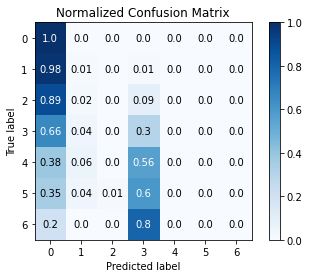

In [71]:
#Plotting Confusion Matrix of Logistic Regression model
skplt.metrics.plot_confusion_matrix(y_test, predmnb, normalize=True)

## Ada Boost Classifier

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
#Instantiating SVC model and training it

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [74]:
# Performing Evaluation metrics for our model
predada= ada.predict(X_test)
print('Accuracy Score for Adaptive Boost Classifier is :',round(accuracy_score(y_test,predada),4)*100,'% \n')
print('Confusion Matrix of Adaptive Boost Classifier : \n',confusion_matrix(y_test,predada), '\n')
print('Classification Adaptive Boost Classifier : \n',classification_report(y_test,predada))
print("Hamming Loss for our Adaptive Boost Classifier is : ",hamming_loss(y_test,predada))

Accuracy Score for Adaptive Boost Classifier is : 90.46 % 

Confusion Matrix of Adaptive Boost Classifier : 
 [[42824    69     0    53     3     1     0]
 [ 1827    28     0    80     0    12     0]
 [  796    18     0   178     4    55     0]
 [  687    14     0   401    28   143     2]
 [  178    10     1   215    24    97     2]
 [   38     0     0    38     9    26     1]
 [    3     1     0     1     2     3     0]] 

Classification Adaptive Boost Classifier : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.20      0.01      0.03      1947
           2       0.00      0.00      0.00      1051
           3       0.42      0.31      0.36      1275
           4       0.34      0.05      0.08       527
           5       0.08      0.23      0.12       112
           6       0.00      0.00      0.00        10

    accuracy                           0.90     47872
   macro avg       0.28      0.23      

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

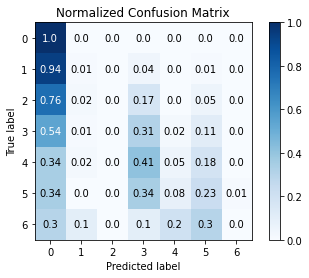

In [75]:
#Plotting Confusion Matrix of AdaBoost model
skplt.metrics.plot_confusion_matrix(y_test, predada, normalize=True)

## Cross Validation

In [76]:
CVscore_LR = cross_val_score(LG,X,y,cv = 10 )
print("Cross validation score of Logistic Regression is :", round(CVscore_LR.mean(),4)*100,'%')

CVscore_RF = cross_val_score(RF,X,y,cv = 10 )
print("Cross validation score of Random Forest Classifier :", round(CVscore_RF.mean(),4)*100,'%')

CVscore_adaboost = cross_val_score(ada,X,y,cv = 10 )
print("Cross validation score of AdaBoost Classifier is :",round(CVscore_adaboost.mean(),4)*100,'%')

CVscore_mnb = cross_val_score(MNB,X,y,cv = 10 )
print("Cross validation score of MNB Classifier is :",round(CVscore_mnb.mean(),4)*100,'%')

Cross validation score of Logistic Regression is : 91.99000000000001 %
Cross validation score of Random Forest Classifier : 89.83 %
Cross validation score of AdaBoost Classifier is : 90.83 %
Cross validation score of MNB Classifier is : 90.81 %


### We can choose MNB as our model since its accuracy and cv score are almost same.

## Hyper Parameter Tuning

In [77]:
# Multinomial Naive Bayes

parameters = {'fit_prior':[True,False], 'alpha':[0.0001,0.001,0.01,0.1,1,10,100]}
MNB = MultinomialNB()
clf = GridSearchCV(MNB,parameters)
clf.fit(X_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'fit_prior': True}


In [78]:
fin_MNB = MultinomialNB(alpha=0.1,fit_prior=True)
fin_MNB.fit(X_train,y_train)
fpredmnb= fin_MNB.predict(X_test)
print('Accuracy Score for Multinomial Naive Bayes Classifier is :',round(accuracy_score(y_test,fpredmnb),4)*100,'% \n')
print('Confusion Matrix of Multinomial Naive Bayes Classifier : \n',confusion_matrix(y_test,fpredmnb), '\n')
print('Classification Multinomial Naive Bayes Classifier : \n',classification_report(y_test,fpredmnb))
print("Hamming Loss for our Multinomial Naive Bayes Classifier model is : ",hamming_loss(y_test,fpredmnb))

Accuracy Score for Multinomial Naive Bayes Classifier is : 91.17 % 

Confusion Matrix of Multinomial Naive Bayes Classifier : 
 [[42867    49     7    24     2     1     0]
 [ 1713   111    24    95     4     0     0]
 [  714    85    39   209     4     0     0]
 [  447   143    62   578    45     0     0]
 [   85    37    26   329    50     0     0]
 [   13    13     3    57    26     0     0]
 [    1     0     0     6     3     0     0]] 

Classification Multinomial Naive Bayes Classifier : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     42950
           1       0.25      0.06      0.09      1947
           2       0.24      0.04      0.06      1051
           3       0.45      0.45      0.45      1275
           4       0.37      0.09      0.15       527
           5       0.00      0.00      0.00       112
           6       0.00      0.00      0.00        10

    accuracy                           0.91     47872
   macro avg

## Predicting Test dataset

In [88]:
tf_vec = TfidfVectorizer(max_features = 20000, stop_words='english')
test_features = tf_vec.fit_transform(test['clean_comment'])

In [89]:
test_pred=fin_MNB.predict(test_features)

In [90]:
test['Target']=test_pred

In [91]:
test.head()

,id,clean_comment,Target
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,0
1,0000247867823ef7,rfc title fine imo,0
2,00013b17ad220c46,source zawe ashton lapland,0
3,00017563c3f7919a,look back source information updated correct f...,0
4,00017695ad8997eb,anonymously edit article,0


In [92]:
test['Target'].value_counts()

0    138301
5     11663
4      1103
3       694
2       678
6       373
1       352
Name: Target, dtype: int64